In [2]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import iris
import numpy as np
from scipy.interpolate import interp1d
import pandas as pd
from glob import glob
from netCDF4 import Dataset
import wrf
ena = {'lat': 39, 'lon': 360 - 28}

## Load datasets

In [3]:
ds_obs = xr.open_dataset('/Users/jone003/tmp/EAGLES/arm_data/enainterpolatedsondeC1.c1.20170718.000030.nc')
# ds_obs

In [6]:
ds_era = xr.open_dataset('/Users/jone003/tmp/EAGLES/ERA5_ENA_20170717-20170719_with_height_and_presl.nc')
# ds_era

### Load WRF
WRF simulation was with one grid (no nesting) centered at ENA, extending +/- ~1 degree, using 82 vertical levels (eta levels shown in cell below), with 3000 m horizontal grid spacing (55 x 60 grid cells) and 10 second timestep.

In [7]:
wrf_output = sorted(glob('/Users/jone003/tmp/EAGLES/WRF/wrfout*'))
wrf_in = [Dataset(f) for f in wrf_output]

In [8]:
lat = wrf.getvar(wrf_in, 'lat', timeidx=wrf.ALL_TIMES, method="cat")
lon = wrf.getvar(wrf_in, 'lon', timeidx=wrf.ALL_TIMES, method='cat')
temp = wrf.getvar(wrf_in, 'tc', timeidx=wrf.ALL_TIMES, method='cat')
theta = wrf.getvar(wrf_in, 'theta', timeidx=wrf.ALL_TIMES, method='cat')
z = wrf.getvar(wrf_in, 'z', timeidx=wrf.ALL_TIMES, method='cat')
rh = wrf.getvar(wrf_in, 'rh', timeidx=wrf.ALL_TIMES, method='cat')
u = wrf.getvar(wrf_in, 'ua', timeidx=wrf.ALL_TIMES, method='cat')
v = wrf.getvar(wrf_in, 'va', timeidx=wrf.ALL_TIMES, method='cat')

In [9]:
qvapor = wrf.getvar(wrf_in, 'QVAPOR', timeidx=wrf.ALL_TIMES, method='cat')
q = qvapor / (1 + qvapor)  # specific humidity

In [10]:
ena_wrf = {'south_north': 26, 'west_east': 27}  # approx 28W, 39N

In [11]:
ds_wrf = xr.Dataset({'temp': temp,
                        'u_wind': u,
                        'v_wind': v,
                        'sh': q,
                        'potential_temp': theta,
                        'height': z / 1000}
                   )
ds_wrf_ena = ds_wrf.isel(**ena_wrf).sel(Time='2017-07-18')

In [12]:
newer_eta_levels = [1.000, 0.999, 0.995, 0.990, 0.985, 0.980, 0.975,
                    0.970, 0.965, 0.960, 0.955, 0.950, 0.945, 0.940, 
                    0.935, 0.930, 0.925, 0.920, 0.915, 0.910, 0.905,
                    0.900, 0.895, 0.891, 0.888, 0.886, 0.884, 0.882,
                    0.880, 0.870, 0.860, 0.847208, 0.8110777, 0.770949, 0.7275254, 
                    0.6840308, 0.642961, 0.6041809, 0.5675629, 0.5329864, 0.5003376, 
                    0.4695089, 0.440399, 0.412912, 0.3869574, 0.3624499, 0.3393086, 
                    0.3174575, 0.2968247, 0.2773421, 0.2589457, 0.2415749, 0.2251725, 
                    0.2096847, 0.1950603, 0.1812512, 0.168212, 0.1558996, 0.1442738, 
                    0.1332961, 0.1229305, 0.1131427, 0.1039006, 0.09517372, 0.08693343, 
                    0.07915249, 0.07180537, 0.06486785, 0.05831715, 0.05213161, 0.04629095, 
                    0.04077588, 0.03556832, 0.03065106, 0.02600794, 0.0216237, 0.01748388, 
                    0.01357488, 0.009883763, 0.006398458, 0.003107458, 0]
len(newer_eta_levels)

82

In [16]:
print('lev', 'eta', 'z (m)', sep='\t')
for i in range(len(newer_eta_levels) - 1):
    print(i, round(newer_eta_levels[i + 1], 3),
          round(ds_wrf_ena.height.isel(Time=6).values[i] * 1000, 2),
          sep='\t')

lev	eta	z (m)
0	0.999	52.16
1	0.995	72.97
2	0.99	110.51
3	0.985	152.36
4	0.98	194.37
5	0.975	236.53
6	0.97	278.85
7	0.965	321.33
8	0.96	363.96
9	0.955	406.75
10	0.95	449.7
11	0.945	492.81
12	0.94	536.1
13	0.935	579.56
14	0.93	623.21
15	0.925	667.06
16	0.92	711.11
17	0.915	755.36
18	0.91	799.83
19	0.905	844.54
20	0.9	889.51
21	0.895	934.77
22	0.891	975.73
23	0.888	1007.74
24	0.886	1030.7
25	0.884	1049.11
26	0.882	1067.56
27	0.88	1086.05
28	0.87	1141.86
29	0.86	1235.45
30	0.847	1343.36
31	0.811	1580.42
32	0.771	1960.14
33	0.728	2394.08
34	0.684	2866.71
35	0.643	3349.19
36	0.604	3827.68
37	0.568	4301.82
38	0.533	4771.37
39	0.5	5236.59
40	0.47	5697.19
41	0.44	6152.35
42	0.413	6601.99
43	0.387	7046.33
44	0.362	7485.54
45	0.339	7919.88
46	0.317	8348.87
47	0.297	8771.55
48	0.277	9187.61
49	0.259	9597.13
50	0.242	10000.3
51	0.225	10397.22
52	0.21	10787.88
53	0.195	11172.49
54	0.181	11551.53
55	0.168	11925.48
56	0.156	12294.59
57	0.144	12659.07
58	0.133	13019.23
59	0.123	13375.55
60	0.113	13728

# Compare ERA5 reanalysis to ARM obs at ENA site

In [40]:
zobs = ds_obs['height']
height = ds_era['height']  # dims ('lev', 'time', 'lat', 'lon')

In [41]:
# optionally interpolate ds_era to same height levels as obs ds
# should make it easier to compare directly, but not really needed if just plotting
def interp_to_height(ds_era, height_obs):
    height = ds_era['height'].transpose('time', 'lev', 'lat', 'lon')  # originally (lev, time, lat, lon)
    height = height[:, ::-1, :, :]  # ordered as increasing height
    ax0 = height.dims.index('lev')
    
    var_list = [v for v in ds_era if 'lev' in ds_era[v].dims]  # time, lev, lat, lon
    
    time = ds_era.time.values
    lat = ds_era.lat.values
    lon = ds_era.lon.values
    ntime = len(time)
    nlat = len(lat)
    nlon = len(lon)
    nheight = len(height_obs)
    out_shape = (ntime, nheight, nlat, nlon)
    
    ds_out = xr.Dataset()
    ds_out['height'] = height_obs
    # easiest to just loop over columns (even if that feels dumb)
    # new output has shape time, nheight, nlat, nlon
    for v in var_list:
        print(v)
        if v == 'height':
            continue
        # note: need to reverse order so height increases
        arr_in = ds_era[v].transpose('time', 'lev', 'lat', 'lon').values[:, ::-1, :, :]
        arr_out = np.full(out_shape, np.nan)
        print(arr_out.shape)
        print(arr_in.shape)
        for jt in range(ntime):
            for jlat in range(nlat):
                for jlon in range(nlon):
                    arr_out[jt, :, jlat, jlon] = np.interp(height_obs.values,
                                                           height[jt, :, jlat, jlon],
                                                           arr_in[jt, :, jlat, jlon])
        da = xr.DataArray(arr_out, coords=[time, height_obs, lat, lon],
                          dims=['time', 'height', 'lat', 'lon'],
                          name=v,
                          attrs=ds_era[v].attrs)
        ds_out[v] = da.copy(deep=True)
    return ds_out

In [42]:
ds_era_height = interp_to_height(ds_era, zobs)
# ds_era_height

TMP
(72, 332, 9, 9)
(72, 137, 9, 9)
SPFH
(72, 332, 9, 9)
(72, 137, 9, 9)
UGRD
(72, 332, 9, 9)
(72, 137, 9, 9)
VGRD
(72, 332, 9, 9)
(72, 137, 9, 9)
height
pressure
(72, 332, 9, 9)
(72, 137, 9, 9)


In [43]:
theta = ds_era_height['TMP'] * (1000 * 100 / ds_era_height['pressure']) ** (0.286)
theta.attrs = {'units': 'K', 'long_name': 'potential temperature'}
ds_era_height['potential_temp'] = theta
ds_era_height

<xarray.Dataset>
Dimensions:         (height: 332, lat: 9, lon: 9, time: 72)
Coordinates:
  * height          (height) float32 0.03048 0.05048 ... 40.510487 41.010487
  * time            (time) datetime64[ns] 2017-07-17 ... 2017-07-19T23:00:00
  * lat             (lat) float32 40.0 39.75 39.5 39.25 ... 38.5 38.25 38.0
  * lon             (lon) float32 331.0 331.25 331.5 ... 332.5 332.75 333.0
Data variables:
    TMP             (time, height, lat, lon) float64 294.9 294.6 ... 261.7 261.8
    SPFH            (time, height, lat, lon) float64 0.01439 ... 3.702e-06
    UGRD            (time, height, lat, lon) float64 5.04 4.342 ... -31.5 -31.63
    VGRD            (time, height, lat, lon) float64 6.525 6.75 ... -2.478
    pressure        (time, height, lat, lon) float64 1.023e+05 ... 265.1
    potential_temp  (time, height, lat, lon) float64 293.0 292.7 ... 1.428e+03

In [44]:
# for initial comparison, select lat, lon = (39, -28)
ds_era_ena = ds_era.sel(**ena, time='2017-07-18')
if 'lev' in ds_era_height:
    ds_era_height_ena = ds_era_height.drop('lev').sel(**ena, time='2017-07-18')
else:
    ds_era_height_ena = ds_era_height.sel(**ena, time='2017-07-18')    

In [47]:
# Hourly resample obs
ds_obs_hourly = ds_obs.resample(time='1H').mean()
ds_obs_hourly

/anaconda3/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:            (height: 332, time: 24)
Coordinates:
  * time               (time) datetime64[ns] 2017-07-18 ... 2017-07-18T23:00:00
  * height             (height) float32 0.03048 0.05048 ... 40.510487 41.010487
Data variables:
    precip             (time) float32 0.0 0.0 0.0 0.0 ... 8.3333333e-07 0.0 0.0
    qc_precip          (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    temp               (time, height) float32 22.19273 22.217276 ... nan nan
    qc_temp            (time, height) float64 0.0 0.0 0.0 0.0 ... 4.0 4.0 4.0
    source_temp        (time, height) float64 1.0 1.0 1.0 1.0 ... nan nan nan
    rh                 (time, height) float32 94.79914 93.27482 ... nan nan
    qc_rh              (time, height) float64 0.0 0.0 0.0 0.0 ... 4.0 4.0 4.0
    source_rh          (time, height) float64 1.0 1.0 1.0 1.0 ... nan nan nan
    vap_pres           (time, height) float32 2.5351167 2.4980872 ... nan nan
    qc_vap_pres        (time, height) float64 

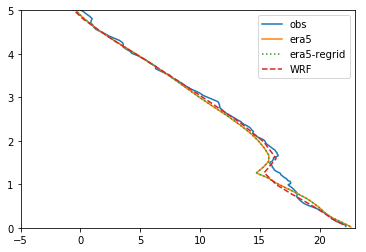

In [79]:
# sanity check to verify regridding of era5 was reasonable
i = 0
z_obs = ds_obs_hourly.height
plt.plot(ds_obs_hourly.temp.isel(time=i), z_obs)
plt.plot(ds_era_ena.TMP.isel(time=i) - 273.15, ds_era_ena.height.isel(time=0))
plt.plot(ds_era_height_ena.TMP.isel(time=i) - 273.15, ds_era_height_ena.height,':')
plt.plot(ds_wrf_ena.temp.isel(Time=i), ds_wrf_ena.height.isel(Time=i),'--')
plt.ylim([0, 5])
plt.xlim([-5, 23])
plt.legend(['obs', 'era5', 'era5-regrid', 'WRF'])

In [48]:
# join era and obs:
ds1 = ds_era_height_ena.rename({'TMP': 'temp',
                                'UGRD': 'u_wind',
                                'VGRD': 'v_wind',
                                'SPFH': 'sh'}).drop(['lat', 'lon'])
if ds1['temp'].min() > 50:
    # convert to celsius
    ds1['temp'].values = ds1['temp'].values - 273.15
vars_to_combine = ['temp', 'u_wind', 'v_wind', 'sh']
ds_combined = xr.concat([ds1[vars_to_combine], ds_obs_hourly[vars_to_combine]],
                        dim=pd.Index(('ERA5', 'Obs'), name='data'))

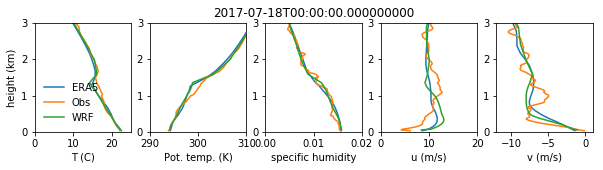

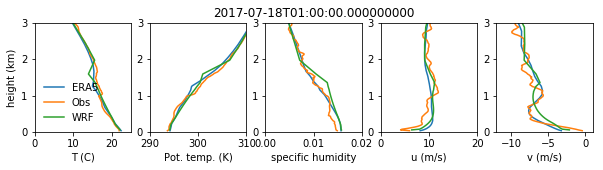

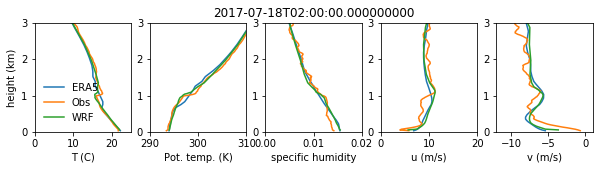

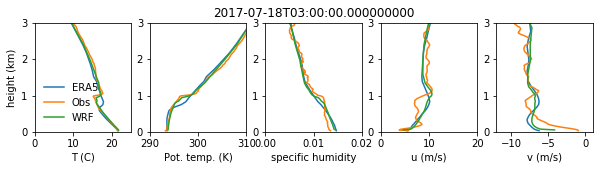

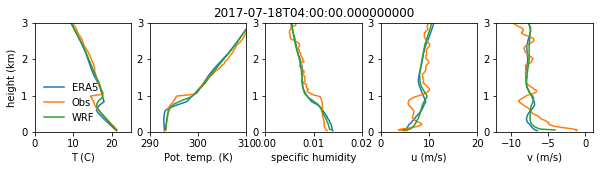

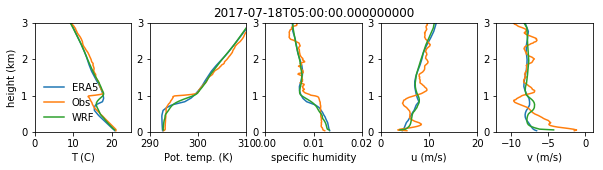

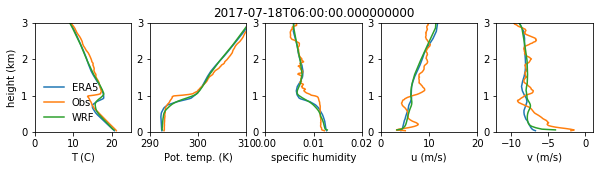

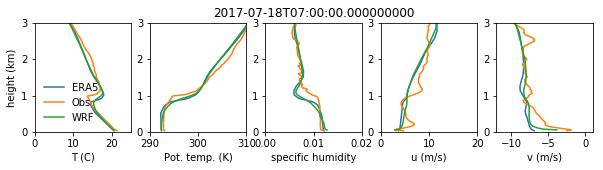

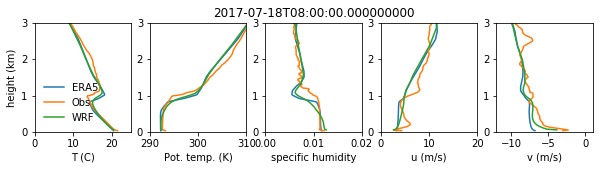

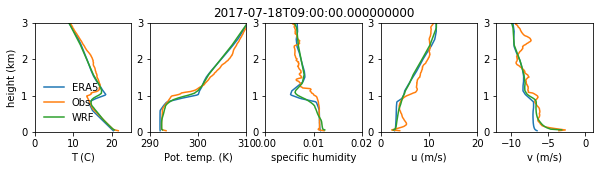

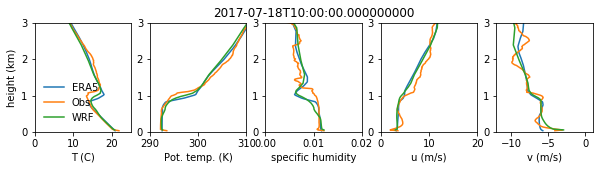

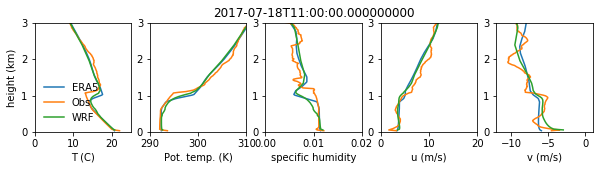

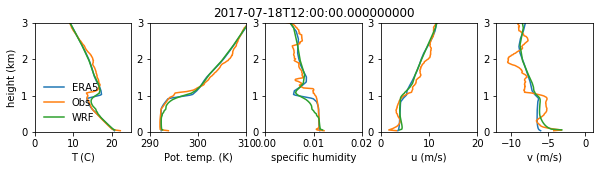

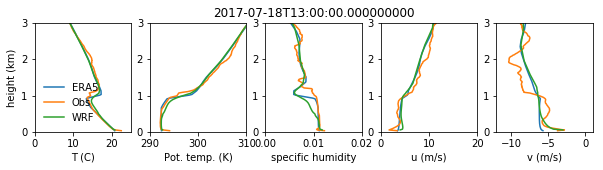

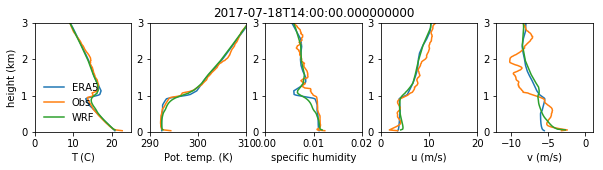

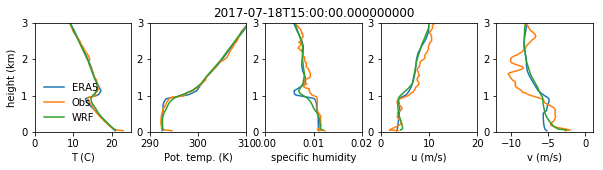

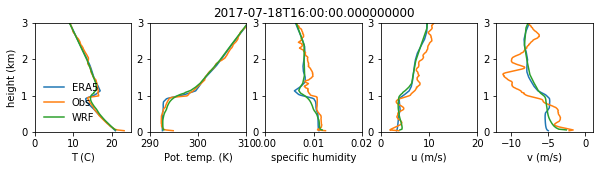

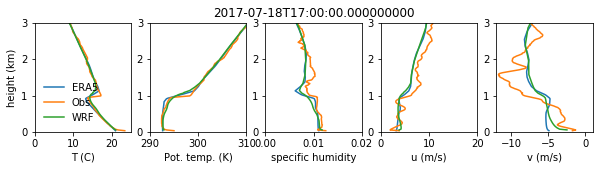

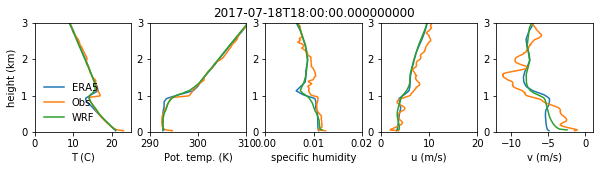

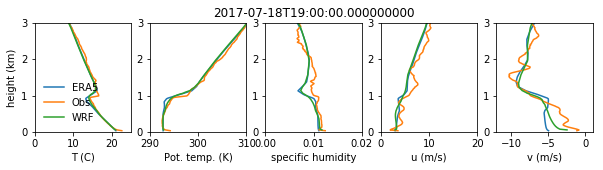

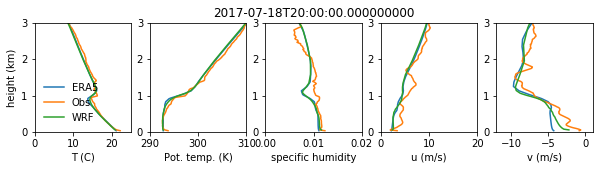

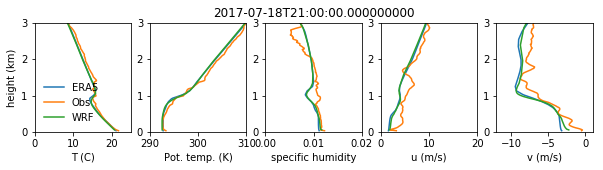

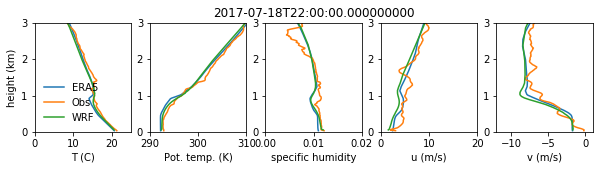

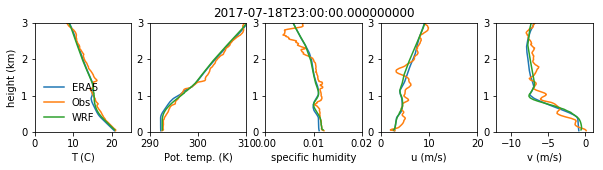

In [53]:
# make a long set of plots:
# all together together: 
#    fig, axes = plt.subplots(ncols=5, nrows=24, figsize=(8, 48)
# but, it looks better if they're all separate instead

save_fig = True
z = ds_combined.height
ylims = [0, 3]
xlims = [(0, 25), (290, 310), (0, 0.02), (0, 20), (-12, 1)]
ylab = 'height (km)'
xlab = ['T (C)', 'Pot. temp. (K)', 'specific humidity', 'u (m/s)', 'v (m/s)']
for n in range(len(ds1.time)):
    fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(10, 2))
    for j, v in enumerate(['temp', 'potential_temp', 'sh', 'u_wind', 'v_wind']):
        ax = axes[j]  
        ax.plot(ds1[v].isel(time=n), z)
        ax.plot(ds_obs_hourly[v].isel(time=n), z)
        ax.plot(ds_wrf_ena[v].isel(Time=n), ds_wrf_ena.height.isel(Time=n))
        ax.set_ylim(ylims)
        ax.set_xlim(xlims[j])
        if (j == 0):
            ax.legend(['ERA5', 'Obs', 'WRF'], frameon=False)
        if j == 0:
            ax.set_ylabel(ylab)
        if j == 2:
            ax.set_title(ds1.time.values[n])
        ax.set_xlabel(xlab[j])
    if save_fig:
        out_name = f'era5_v_wrf_v_obs_ena_20170718_{n:02}.png'
        fig.savefig(out_name)
    plt.show()